In [5]:
import pandas as pd
from tqdm.auto import tqdm
import actions
from pathlib import Path
from utils import *
import re
from tqdm.auto import tqdm
import json

In [6]:
# Define the file paths
parquet_file_abcd = Path("../data/ABCD_tripfiles.parquet")
parquet_file_abcd_conv = Path("../data/ABCD_tripfiles_conv.parquet")
parquet_file_mnop = Path("../data/MNOP_tripfiles.parquet")
parquet_file_mnop_conv = Path("../data/MNOP_tripfiles_conv.parquet")
parquet_file_zyxw = Path("../data/ZYXW_tripfiles.parquet")
parquet_file_zyxw_conv = Path("../data/ZYXW_tripfiles_conv.parquet")
print(
    parquet_file_abcd,
    parquet_file_abcd_conv,
    parquet_file_mnop,
    parquet_file_mnop_conv,
    parquet_file_zyxw,
    parquet_file_zyxw_conv,
)

..\data\ABCD_tripfiles.parquet ..\data\ABCD_tripfiles_conv.parquet ..\data\MNOP_tripfiles.parquet ..\data\MNOP_tripfiles_conv.parquet ..\data\ZYXW_tripfiles.parquet ..\data\ZYXW_tripfiles_conv.parquet


In [7]:
df_abcd = pd.read_parquet(parquet_file_abcd)
df_mnop = pd.read_parquet(parquet_file_mnop)
df_zyxw = pd.read_parquet(parquet_file_zyxw)

In [8]:
print(round(df_abcd.memory_usage(deep=True).sum() / 1024**2, 2), "MB")
print(round(df_mnop.memory_usage(deep=True).sum() / 1024**2, 2), "MB")
print(round(df_zyxw.memory_usage(deep=True).sum() / 1024**2, 2), "MB")

1214.94 MB
2219.62 MB
585.54 MB


In [15]:
action_names = set(df_abcd.action_name.unique())
print(len(action_names))
action_names.update(set(df_mnop.action_name.unique()))
print(len(action_names))
action_names.update(set(df_zyxw.action_name.unique()))
print(len(action_names))

49
62
67


In [13]:
from actions import (
    CalculateWeightAndTrimAction,
    CheckinMsgProcessor,
    EstimateStorePaxDataAction,
    SendFuelOrderAction,
    SendLoadingInstructionAction,
    SendLoadsheetAction,
    SetActualBagWeightIndicatorAction,
    SetCKIPaxDistributionAction,
    StoreAircraftDataAction,
    StorePaxDataAction,
    StoreRegistrationAndConfigurationAc,
    TdmCreateLoadingInstructionAction,
    CreateZFWMessageAction,
    UpdateFuelDataAction,
    RampFinalAction,
    CreateLoadingInstructionAction,
    EstimateStorePaxDataAction,
    TransferCargoAction,
    TransferCheckinDataAction,
    UpdateEstimatesAction,
    # UpdateCargoMailEstimatesAction,
    # UpdateLastEzfwSentAction
    UpdateLoadTableAction,
)

In [17]:
action_extractors = {
    "CalculateWeightAndTrimAction": CalculateWeightAndTrimAction.extract,
    "CheckinMsgProcessor": CheckinMsgProcessor.extract,
    # TODO "CreateLoadsheetAction": CreateLoadsheetAction.extract, # missing
    "CreateZFWMessageAction": CreateZFWMessageAction.extract,
    "SendFuelOrderAction": SendFuelOrderAction.extract,
    "SendLoadsheetAction": SendLoadsheetAction.extract,
    "SetActualBagWeightIndicatorAction": SetActualBagWeightIndicatorAction.extract,
    "StorePaxDataAction": StorePaxDataAction.extract,
    "StoreRegistrationAndConfigurationAc": StoreRegistrationAndConfigurationAc.extract,
    "UpdateFuelDataAction": UpdateFuelDataAction.extract,
    "RampFinalAction": RampFinalAction.extract,
    "CreateLoadingInstructionAction": CreateLoadingInstructionAction.extract,
    # "CopyPaxDataAction": CopyPaxDataAction.extract, # where did you go?
    # "CreateBaggageLoadItemsAction": CreateBaggageLoadItemsAction.extract, # where did you go?
    "EstimateStorePaxDataAction": EstimateStorePaxDataAction.extract,
    "SendLoadingInstructionAction": SendLoadingInstructionAction.extract,
    "SetCKIPaxDistributionAction": SetCKIPaxDistributionAction.extract,
    # TODO "SpecialPaxWeightAction": SpecialPaxWeightAction.extract, # missing
    "StoreAircraftDataAction": StoreAircraftDataAction.extract,
    # "StoreCKIAverageWeightAction": StoreCKIAverageWeightAction.extract, # where did you go?
    "StorePaxDataGuiAction": StorePaxDataAction.extract,
    "TdmCreateLoadingInstructionAction": TdmCreateLoadingInstructionAction.extract,
    "TransferCargoAction": TransferCargoAction.extract,
    "TransferCheckinDataAction": TransferCheckinDataAction.extract,
    # "UpdateCargoMailEstimatesAction": UpdateCargoMailEstimatesAction.extract,# where did you go?
    "UpdateEstimatesAction": UpdateEstimatesAction.extract,
    # "UpdateLastEzfwSentAction": None, # where did you go?
    "UpdateLoadTableAction": UpdateLoadTableAction.extract,
}

In [21]:
df_abcd_conv.columns

Index(['id', 'creation_time', 'airline_code', 'flight_number', 'flight_date',
       'departure_airport', 'user_name', 'action_name', 'header_line',
       'entry_details', 'data_UpdateFuelDataAction', 'data_RampFinalAction',
       'data_CreateLoadingInstructionAction',
       'data_EstimateStorePaxDataAction', 'data_SendLoadingInstructionAction',
       'data_SetCKIPaxDistributionAction',
       'data_TdmCreateLoadingInstructionAction', 'data_UpdateEstimatesAction'],
      dtype='object')

In [18]:
def extract_df(df: pd.DataFrame):
    tqdm.pandas()
    for action_name, extractor in action_extractors.items():

        if extractor is not None:
            print(action_name)

            df[f"data_{action_name}"] = df[df.action_name == action_name][
                "entry_details"
            ].progress_apply(extractor)
    return df


df_abcd_conv = extract_df(df_abcd)
df_abcd_conv.to_parquet(parquet_file_abcd_conv, engine="pyarrow", compression="brotli")

df_mnop_conv = extract_df(df_mnop)
df_mnop_conv.to_parquet(parquet_file_mnop_conv, engine="pyarrow", compression="brotli")

df_zyxw_conv = extract_df(df_zyxw)
df_zyxw_conv.to_parquet(parquet_file_zyxw_conv, engine="pyarrow", compression="brotli")

UpdateFuelDataAction


100%|██████████| 3583/3583 [00:00<00:00, 62308.26it/s]


RampFinalAction


100%|██████████| 3804/3804 [00:00<00:00, 37741.03it/s]


CreateLoadingInstructionAction


100%|██████████| 6408/6408 [00:00<00:00, 128017.89it/s]


EstimateStorePaxDataAction


100%|██████████| 5069/5069 [00:00<00:00, 81430.79it/s]


SendLoadingInstructionAction


100%|██████████| 4/4 [00:00<00:00, 3993.62it/s]


SetCKIPaxDistributionAction


0it [00:00, ?it/s]


TdmCreateLoadingInstructionAction


0it [00:00, ?it/s]


UpdateEstimatesAction


100%|██████████| 1870/1870 [00:00<00:00, 11233.38it/s]


UpdateFuelDataAction


100%|██████████| 4845/4845 [00:00<00:00, 93821.69it/s]


RampFinalAction


100%|██████████| 5612/5612 [00:00<00:00, 43888.38it/s]

CreateLoadingInstructionAction



100%|██████████| 2405/2405 [00:00<00:00, 89731.10it/s]


EstimateStorePaxDataAction


100%|██████████| 4633/4633 [00:00<00:00, 1026963.87it/s]


SendLoadingInstructionAction


100%|██████████| 96/96 [00:00<00:00, 63680.72it/s]

SetCKIPaxDistributionAction



0it [00:00, ?it/s]


TdmCreateLoadingInstructionAction


100%|██████████| 1182/1182 [00:00<00:00, 53656.73it/s]

UpdateEstimatesAction



100%|██████████| 174/174 [00:00<00:00, 8697.93it/s]


UpdateFuelDataAction


100%|██████████| 125/125 [00:00<00:00, 125038.87it/s]


RampFinalAction


100%|██████████| 65/65 [00:00<00:00, 64927.31it/s]


CreateLoadingInstructionAction


100%|██████████| 129/129 [00:00<?, ?it/s]


EstimateStorePaxDataAction


100%|██████████| 8681/8681 [00:00<00:00, 866118.44it/s]


SendLoadingInstructionAction


100%|██████████| 2/2 [00:00<?, ?it/s]

SetCKIPaxDistributionAction



100%|██████████| 11598/11598 [00:00<00:00, 41736.80it/s]


TdmCreateLoadingInstructionAction


100%|██████████| 6/6 [00:00<?, ?it/s]


UpdateEstimatesAction


0it [00:00, ?it/s]


In [8]:
df = df_mnop


x = df[
    (df.action_name == "TdmCreateLoadingInstructionAction")
    # & (~df["entry_details"].isnull())
    & (
        ~df["entry_details"].str.contains(
            "com.systemone.lc2.common.dto.SingleAttributeDTO", na=False
        )
    )
    & (
        ~df["entry_details"].str.contains("STATUS LOADING_INSTRUCTION", na=False)
    )  # STATUS LOZYING_INSTRUCTION also included
    & (~df["entry_details"].str.contains("STATUS LOZYING_INSTRUCTION", na=False))
    & (
        ~df["entry_details"].str.contains("Email receivers", na=False)
    )  # don't include this
    & (
        ~df["entry_details"].str.contains("Telex receivers", na=False)
    )  # don't include this
]["entry_details"].unique()

KeyboardInterrupt: 

In [ ]:
print(x[2])

IndexError: index 2 is out of bounds for axis 0 with size 0

In [ ]:
def extract(message: str):
    typos = {
        "BAG_LOZY_ITEMS_GEN": "BAG_LOAD_ITEMS_GEN",
        "LOZYING_INSTRUCTION": "LOADING_INSTRUCTION",
        "LOZYSHEET": "LOADSHEET",
    }  # Fix typos in the messages from zyxw
    for key, value in typos.items():
        message = message.replace(key, value)

    if "com.systemone.lc2.common.dto.SingleAttributeDTO" in message:
        return None
    if "STATUS LOADING_INSTRUCTION" in message:
        """ 
        Example Message: 'STATUS LOADING_INSTRUCTION 1 FUEL 2 AIRCRAFT_CONFIG 1 EZFW 1 
        CARGO_FINAL 1 CARGO_TRANSFER 1 OFP 2 CABIN_CONFIG 1 AUTO_MODE_ACTIVE 1 AUTOMATION_STARTED 0 
        BAG_LOAD_ITEMS_GEN 1 EZFW_COUNTER 1 REGISTRATION 1 REGISTRATION_CHANGE 1 FUEL_ORDER 2'
        
        All the keys are separated by a space and the values are the next element in the list.
        """
        keys = [
            "LOADING_INSTRUCTION",
            "FUEL",
            "AIRCRAFT_CONFIG",
            "EZFW",
            "CARGO_FINAL",
            "CARGO_TRANSFER",
            "OFP",
            "CABIN_CONFIG",
            "AUTO_MODE_ACTIVE",
            "AUTOMATION_STARTED",
            "BAG_LOAD_ITEMS_GEN",
            "EZFW_COUNTER",
            "REGISTRATION",
            "REGISTRATION_CHANGE",
            "FUEL_ORDER",
            "DGR_ITEMS",
            "CHECK_IN_FINAL",
            "OFFBLOCK",
            "AIRBORNE",
            "BAG_ULD_ORD",
            "CALC_HIST_DATA",
        ]

        # Initialize dictionary with None for all keys
        data = {key: None for key in keys}

        # Split the message into parts
        parts = message.split()

        # Iterate through parts and extract key-value pairs
        i = 0
        while i < len(parts):
            if parts[i] in keys:
                key = parts[i]
                if i + 1 < len(parts) and re.match(r"^-?\d+(\.\d+)?$", parts[i + 1]):
                    value = parts[i + 1]
                    data[key] = int(value)
                    i += 2
                else:
                    i += 1
            else:
                i += 1

        return  json.dumps(data)
    
    if "Telex receivers" in message or "Email receivers" in message: 
       return None #not relevant enough
    raise NotImplementedError("This message is not supported yet")

In [ ]:
tqdm.pandas()

In [ ]:
foo = df_mnop[df_mnop.action_name == "TdmCreateLoadingInstructionAction"][
    "entry_details"
].progress_apply(extract)

100%|██████████| 1182/1182 [00:00<00:00, 38129.45it/s]


In [ ]:
foo[foo.str.contains("LOADING_INSTRUCTION", na=False)].count()

394

In [ ]:
print(extract(x[0]))

{
  "Telex receivers": "ASRV1ZY",
  "Message type": "LOADING_INSTRUCTION",
  "Subject": "ZY2111/03MAY BVH-MCZ; Loading Instruction Edition 01\r",
  "Attachment file name": null,
  "Compartments": [],
  "Notes": null
}


In [ ]:

x["data_UpdateEstimatesAction"] = x[x.action_name == "UpdateEstimatesAction"][
    "entry_details"
].progress_apply(extract)

AttributeError: 'numpy.ndarray' object has no attribute 'action_name'

In [19]:
x = df_abcd.copy()

In [62]:
bar = pd.read_parquet(parquet_file_zyxw_conv)

In [47]:
bar.columns

Index(['id', 'creation_time', 'airline_code', 'flight_number', 'flight_date',
       'departure_airport', 'user_name', 'action_name', 'header_line',
       'entry_details', 'data_UpdateFuelDataAction', 'data_RampFinalAction',
       'data_CreateLoadingInstructionAction',
       'data_EstimateStorePaxDataAction', 'data_SendLoadingInstructionAction',
       'data_SetCKIPaxDistributionAction',
       'data_TdmCreateLoadingInstructionAction', 'data_UpdateEstimatesAction'],
      dtype='object')

In [50]:
filtered_data = [item for item in x if "Discrepancy check result" in item]

In [63]:
x = bar[~bar.data_SetCKIPaxDistributionAction.isna()]

In [95]:
list(x.data_SetCKIPaxDistributionAction.apply(json.loads))

[{'TOTAL Pax': 6,
  'Y': 6,
  'Jump': 0,
  'StandBy': None,
  'Male': 2,
  'Female': 2,
  'Child': 2,
  'Infant': 0,
  'Total bag': 6,
  'Total bag weight': 72.0,
  'Baggage weight type': 'HISTORIC',
  'Weight unit': 'KG',
  'Sections': {'0A': {'Capacity': 'Y72', 'Distribution': 'Y0'},
   '0C': {'Capacity': 'Y102', 'Distribution': 'Y0'}},
  'Distribution': 'CKI_DISTRIBUTION'},
 {'TOTAL Pax': None,
  'Y': 0,
  'Jump': None,
  'StandBy': None,
  'Male': None,
  'Female': None,
  'Child': None,
  'Infant': None,
  'Total bag': 0,
  'Total bag weight': 0.0,
  'Baggage weight type': 'HISTORIC',
  'Weight unit': 'KG',
  'Sections': {'0A': {'Capacity': 'Y58', 'Distribution': 'Y0'},
   '0C': {'Capacity': 'Y60', 'Distribution': 'Y0'}},
  'Distribution': 'CKI_DISTRIBUTION'},
 {'TOTAL Pax': None,
  'Y': 0,
  'Jump': None,
  'StandBy': None,
  'Male': None,
  'Female': None,
  'Child': None,
  'Infant': None,
  'Total bag': 0,
  'Total bag weight': 0.0,
  'Baggage weight type': 'HISTORIC',
  'Weig

In [132]:
list(x.data_UpdateEstimatesAction.apply(json.loads))

TypeError: the JSON object must be str, bytes or bytearray, not NoneType

In [155]:
foobar = [
    item[list(item.keys())[13]]
    for item in list(x.data_SetCKIPaxDistributionAction.apply(json.loads)) if len(item.keys()) >11
    # if "HISTORIC" not in item["Baggage weight type"]
]

In [137]:
import matplotlib.pyplot as plt

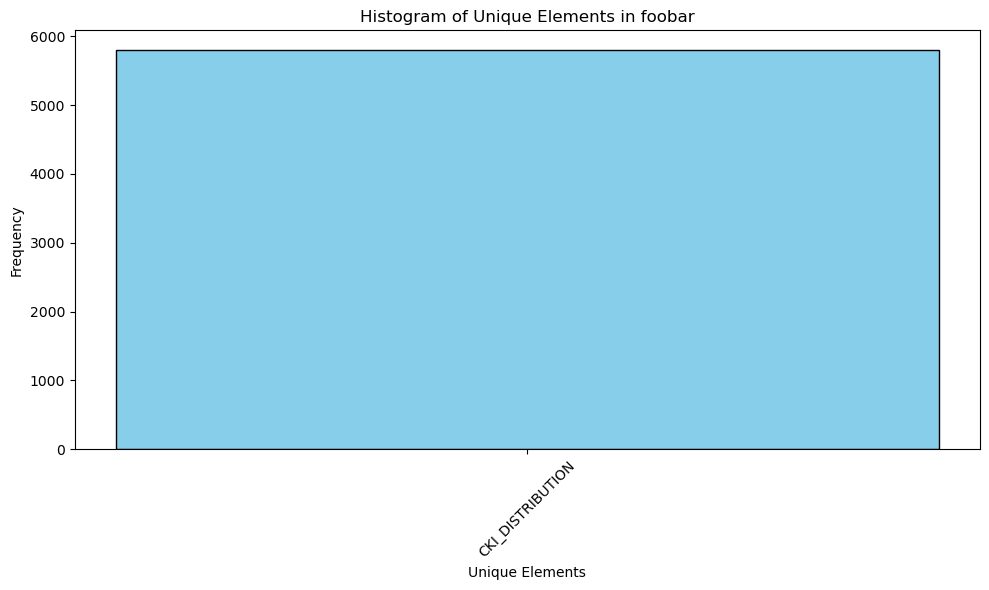

In [156]:
import matplotlib.pyplot as plt
from collections import Counter

# Sample list with mixed types
# foobar = [1, 2, 'apple', 2, 'banana', 'apple', 4, 'banana', 'carrot', 5, 6, 'apple']

# Count the frequency of each unique element
frequency = Counter(foobar)

# Extract unique elements and their counts, convert elements to strings
unique_elements = list(map(str, frequency.keys()))
counts = list(frequency.values())

# Plot the histogram (bar chart)
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.bar(unique_elements, counts, color='skyblue', edgecolor='black')

# Add titles and labels for better readability
plt.title('Histogram of Unique Elements in foobar')
plt.xlabel('Unique Elements')
plt.ylabel('Frequency')

# Rotate the x-axis labels if they overlap
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


In [135]:
set(foobar)

{0.0,
 126.0,
 144.0,
 1712.0,
 189.0,
 24.0,
 260.0,
 32.0,
 3552.0,
 357.0,
 360.0,
 3680.0,
 4000.0,
 460.0,
 4680.0,
 522.0,
 5960.0,
 60.0,
 702.0,
 72.0,
 924.0,
 'ACTUAL',
 'HISTORIC',
 'KG'}